In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import logit
import matplotlib
matplotlib.rcParams.update({'font.size': 15})

In [2]:
df = pd.read_csv('Bromination.csv').merge(pd.read_csv('Bromination_result.csv'), left_on='Reaction Smiles', right_on='rxn_smiles')
df = df[['rxn_smiles', 'Sigma_p', 'logit score', 'feasible_probability']]
df

,rxn_smiles,Sigma_p,logit score,feasible_probability
0,NC1=CC=CC=C1.BrBr>>NC1=CC=C(Br)C=C1.Br,-0.30,5.060462,0.992927
1,OC1=CC=CC=C1.BrBr>>OC1=CC=C(Br)C=C1.Br,-0.38,4.934006,0.995275
2,OCC1=CC=CC=C1.BrBr>>OCC1=CC=C(Br)C=C1.Br,-0.12,4.659240,0.997194
3,C(C)(C)CC1=CC=CC=C1.BrBr>>C(C)(C)CC1=CC=C(Br)C...,-0.15,4.495836,0.993578
4,CC1=CC=CC=C1.BrBr>>CC1=CC=C(Br)C=C1.Br,-0.14,3.217863,0.996870
5,C1=CC=CC=C1.BrBr>>C1=CC=C(Br)C=C1.Br,0.00,4.714693,0.997181
6,FC1=CC=CC=C1.BrBr>>FC1=CC=C(Br)C=C1.Br,0.15,3.811222,0.978995
7,ClC1=CC=CC=C1.BrBr>>ClC1=CC=C(Br)C=C1.Br,0.24,2.772652,0.992889
8,BrC1=CC=CC=C1.BrBr>>BrC1=CC=C(Br)C=C1.Br,0.26,2.761682,0.998642
9,IC1=CC=CC=C1.BrBr>>IC1=CC=C(Br)C=C1.Br,0.18,4.343751,0.999263


In [3]:
def least_squares(x, y):

    # assemble matrix A
    A = np.vstack([x, np.ones(len(x))]).T

    # turn y into a column vector
    y = y[:, np.newaxis]

    # Direct least square regression
    alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)

    return alpha

In [4]:
nat = least_squares(df['logit score'], df['Sigma_p'])
gnn = least_squares(logit(df['feasible_probability']), df['Sigma_p'])

C:\Users\yifen\AppData\Local\Temp\ipykernel_25416\2661043427.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


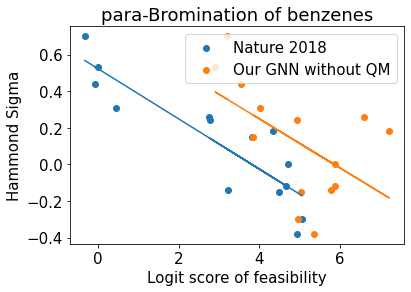

In [5]:
plt.scatter(df['logit score'], df['Sigma_p'], color='tab:blue', label='Nature 2018')
plt.plot(df['logit score'], nat[0]*df['logit score']+nat[1], color='tab:blue')
plt.scatter(logit(df['feasible_probability']), df['Sigma_p'], color='tab:orange', label='Our GNN without QM')
plt.plot(logit(df['feasible_probability']), gnn[0]*logit(df['feasible_probability'])+gnn[1], color='tab:orange')
plt.xlabel('Logit score of feasibility')
plt.ylabel('Hammond Sigma')
plt.title('para-Bromination of benzenes')
plt.legend()
plt.savefig('bro.png', dpi=300, bbox_inches='tight')

In [6]:
df = pd.read_csv('Diels-Alder.csv').merge(pd.read_csv('Diels-Alder_result.csv'), left_on='Reaction Smiles', right_on='rxn_smiles')
df = df[['rxn_smiles', 'dienophile LUMO', 'logit', 'feasible_probability']]
df['logit_'] = logit(df['feasible_probability'])
df

,rxn_smiles,dienophile LUMO,logit,feasible_probability,logit_
0,C=CC1=CC=CC=C1.C1C=CC=C1>>C1C2CC(C1C=C2)C1=CC=...,-0.073518,10.355105,0.656901,0.649514
1,COC(=O)C=C.C1C=CC=C1>>COC(=O)C1CC2CC1C=C2,-0.083558,11.839735,0.585455,0.345209
2,CCCCCC=C.C1C=CC=C1>>CCCCCC1CC2CC1C=C2,-0.022436,5.909931,0.896891,2.163151
3,CN1C(=O)C=CC1=O.C1C=CC=C1>>CN1C(=O)C2C3CC(C=C3...,-0.134464,12.541184,0.597982,0.397065
4,COC(=O)C#CC(=O)OC.C1C=CC=C1>>COC(=O)C1=C(C2CC1...,-0.094373,12.461141,0.618384,0.482693
5,CNC(=O)C=C.C1C=CC=C1>>CNC(=O)C1CC2CC1C=C2,-0.070099,9.332947,0.749976,1.098482
6,CN(C)C1=CC=C(C=C)C=C1.C1C=CC=C1>>CN(C)C1=CC=C(...,-0.050172,10.147809,0.908748,2.298440
7,ClC=C.C1C=CC=C1>>ClC1CC2CC1C=C2,-0.043682,8.823412,0.813039,1.469882
8,COC(=O)C=CC(=O)OC.C1C=CC=C1>>COC(=O)C1C2CC(C=C...,-0.118603,11.342216,0.449698,-0.201889


In [7]:
nat = least_squares(df['logit'], df['dienophile LUMO'])
gnn = least_squares(df['logit_'], df['dienophile LUMO'])

C:\Users\yifen\AppData\Local\Temp\ipykernel_25416\2661043427.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


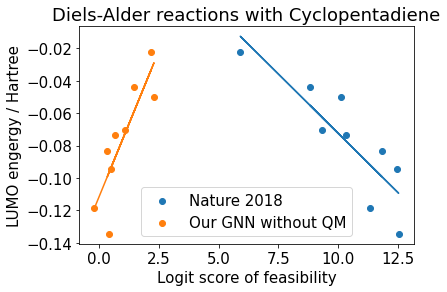

In [8]:
plt.scatter(df['logit'], df['dienophile LUMO'], color='tab:blue', label='Nature 2018')
plt.plot(df['logit'], nat[0]*df['logit']+nat[1], color='tab:blue')
plt.scatter(df['logit_'], df['dienophile LUMO'], color='tab:orange', label='Our GNN without QM')
plt.plot(df['logit_'], gnn[0]*df['logit_']+gnn[1], color='tab:orange')
plt.xlabel('Logit score of feasibility')
plt.ylabel('LUMO engergy / Hartree')
plt.title('Diels-Alder reactions with Cyclopentadiene')
plt.legend()
plt.savefig('da.png', dpi=300, bbox_inches='tight')